<a href="https://colab.research.google.com/github/VictorAlexandr/Data-Science-Libraries/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib
#!pip install numpy

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# link sheet -> https://docs.google.com/spreadsheets/d/1LATsphcsrGNzr0c7gUT8W7v1yTrN2EC1LYTRaPs9BxY/edit?usp=sharing
df = pd.read_excel('sales.xlsx')

In [5]:
df.head()

,order_id,date,price
0,1,2020-03-01,501.17
1,2,2020-03-01,731.26
2,3,2020-03-01,596.96
3,4,2020-03-01,185.23
4,5,2020-03-01,722.01


In [6]:
df.shape

(1000, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  1000 non-null   int64         
 1   date      1000 non-null   datetime64[ns]
 2   price     1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.6 KB


In [8]:
df.describe()

,order_id,date,price
count,1000.000000,1000,1000.000000
mean,500.500000,2020-04-15 18:37:26.400000,526.800360
min,1.000000,2020-03-01 00:00:00,50.550000
25%,250.750000,2020-03-24 00:00:00,284.492500
50%,500.500000,2020-04-16 00:00:00,534.885000
75%,750.250000,2020-05-09 00:00:00,752.052500
max,1000.000000,2020-05-30 00:00:00,1000.650000
std,288.819436,NaN,274.229593


In [9]:
df['month_nm'] = df['date'].dt.month_name()
df['day']      = df['date'].dt.day
df['month']    = df['date'].dt.month
df['pk']       = df.index + 1

In [10]:
del df['pk']

In [11]:
df[(df['date'] >= '2020-05-01') & (df['date'] <= '2020-05-31')]


,order_id,date,price,month_nm,day,month
659,660,2020-05-01,685.12,May,1,5
660,661,2020-05-01,933.27,May,1,5
661,662,2020-05-01,938.65,May,1,5
662,663,2020-05-01,435.68,May,1,5
663,664,2020-05-01,496.73,May,1,5
...,...,...,...,...,...,...
995,996,2020-05-30,592.25,May,30,5
996,997,2020-05-30,603.63,May,30,5
997,998,2020-05-30,182.19,May,30,5
998,999,2020-05-30,549.26,May,30,5


In [12]:
pd.pivot_table(df      #DataFrame Name
, index   = "day"      #Lines
, columns = "month_nm" #Columns
, values  = "price"    #Values
, aggfunc = "mean"     #Aggregation funtction
)

month_nm,April,March,May
day,,,
1,416.360000,469.784615,514.861250
2,626.921429,602.972727,530.154286
3,424.375714,389.098750,374.160000
4,565.341333,352.375714,436.177778
5,693.210000,469.060000,670.887778
6,454.779167,473.246667,517.053636
7,401.183333,550.424000,570.726429
8,489.657500,621.204286,419.441538
9,663.880667,502.648750,609.596000


In [13]:
df.groupby(['month_nm', 'day']).agg(
{  'price':      pd.Series.mean
 , 'order_id': pd.Series.count
}
).reset_index()

,month_nm,day,price,order_id
0,April,1,416.360000,15
1,April,2,626.921429,14
2,April,3,424.375714,14
3,April,4,565.341333,15
4,April,5,693.210000,6
...,...,...,...,...
85,May,26,607.766667,9
86,May,27,400.800000,10
87,May,28,502.749375,16
88,May,29,623.323571,14


,price
count,1000.000000
mean,526.800360
std,274.229593
min,50.550000
25%,284.492500
50%,534.885000
75%,752.052500
max,1000.650000


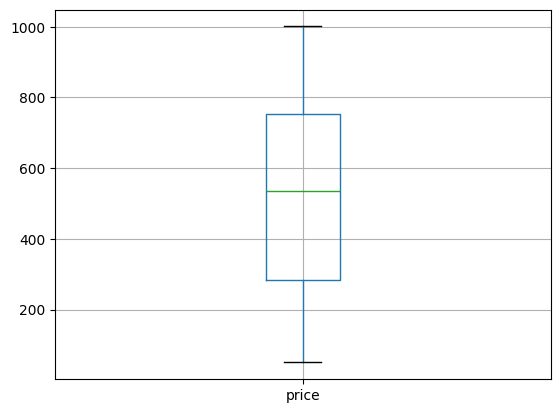

In [14]:
ax = df.boxplot(column=['price'])
df['price'].describe()

<Axes: title={'center': 'Day Over Day x Total Sales Price'}, xlabel='Date', ylabel='Price'>

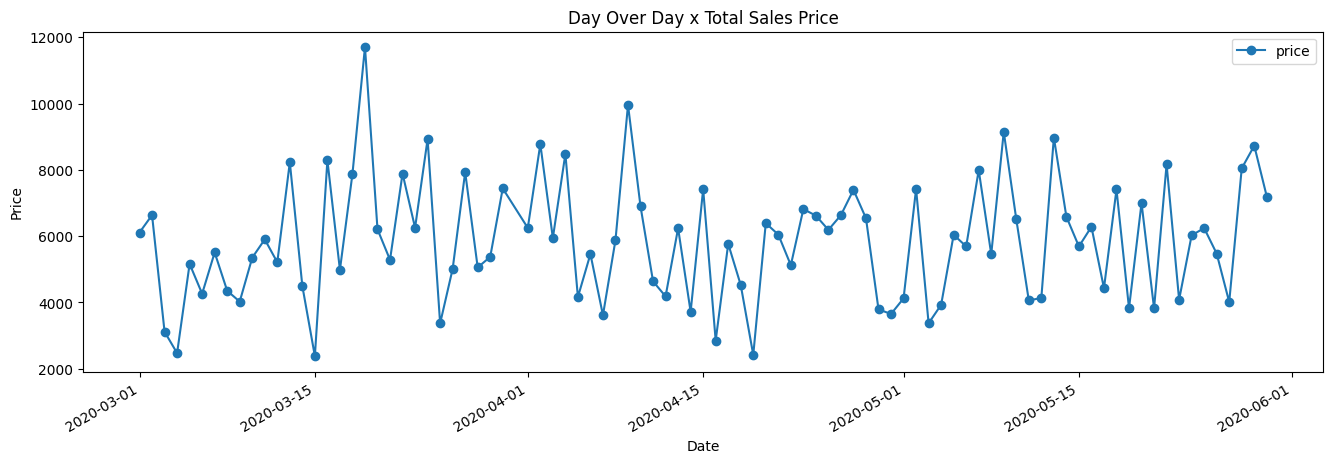

In [16]:
ax = df.groupby(['date']).agg({'price': pd.Series.sum}).plot.line(y='price',figsize=(16,5), marker='o', legend=['price'])

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Day Over Day x Total Sales Price')
ax

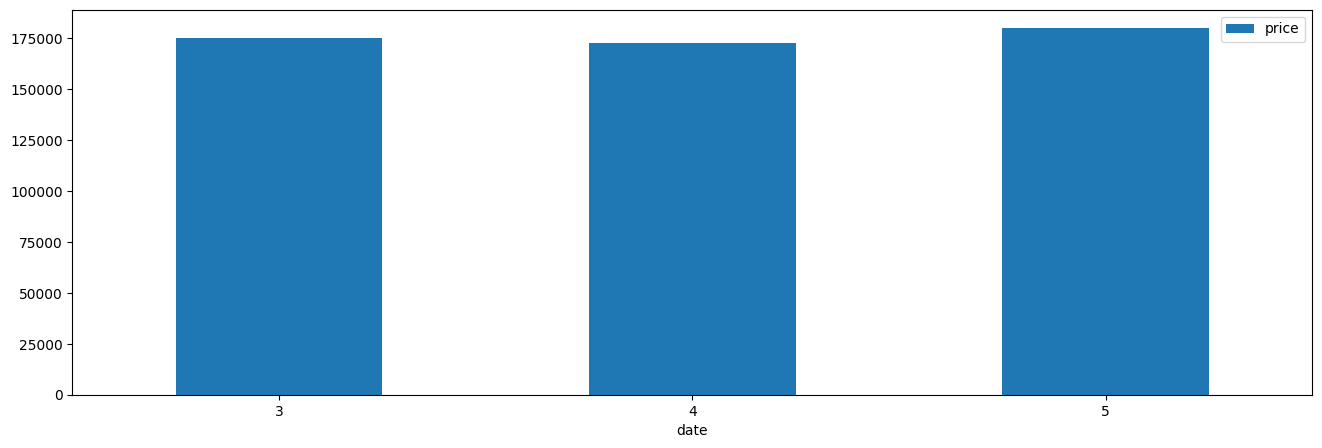

In [17]:
ax = df.groupby(df['date'].dt.month).agg({'price': pd.Series.sum}).plot.bar(figsize=(16,5), rot=0)


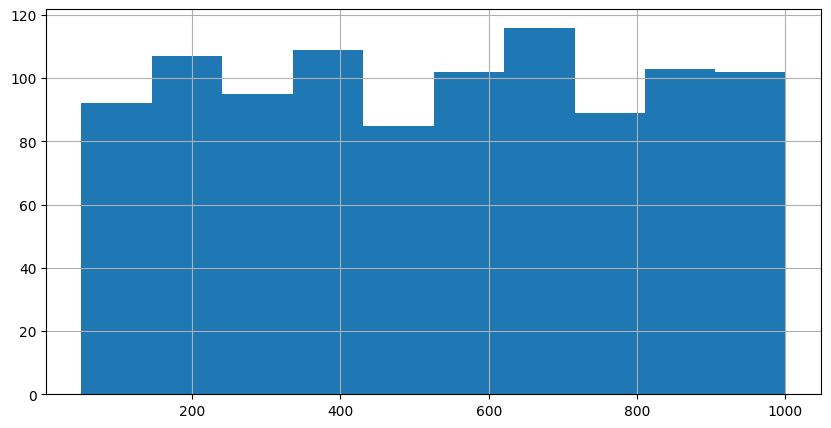

In [18]:
ax = df['price'].hist(figsize=(10,5))


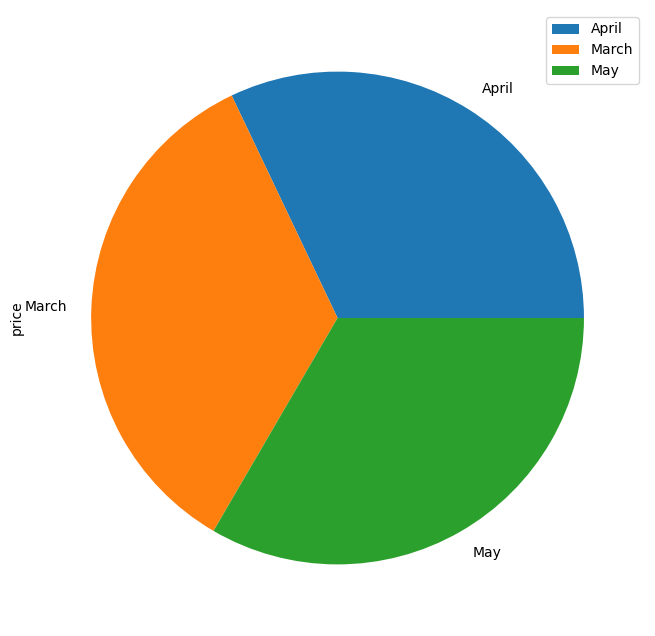

In [19]:
ax = df.groupby(['month_nm']).agg({'price': pd.Series.median}).plot.pie(x='month_nm',y='price', figsize=(8,8))


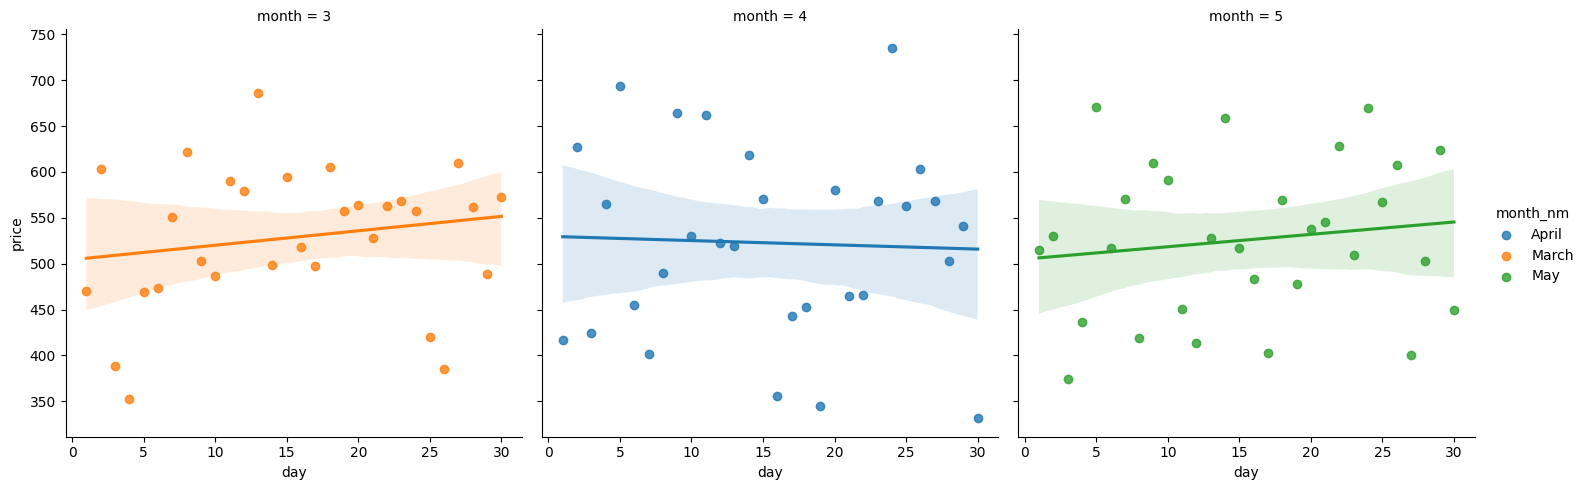

In [20]:
dfLR = pd.DataFrame(df.groupby(['day', 'month_nm', 'month']).agg({'price': pd.Series.mean}).reset_index())

ax = sns.lmplot(data=dfLR, x="day", y="price", hue="month_nm", col="month")